In [8]:
import csv
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import pandas as pd
from random import shuffle
import numpy as np
from numpy import arange, round, rint
from sklearn.metrics import confusion_matrix
from tools import plot_confusion_matrix
from sklearn.svm import SVC


def read_data(filename="datasets/breast-cancer-wisconsin.data"):
    x = []
    y = []
    
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            row.pop(0) #removing the id from each entry
            for i in range(len(row)):
                if row[i] == '?':
                    row[i] = 0
            x.append(list(map(float, row[:-1])))
            y.append([int(row[-1])])

    return x, y
x,y = read_data()


for i in range(len(y)):
    if y[i] == [2]:
        y[i] = [0]
    else:
        y[i] = [1]
        

def shuffle_data(x, y):
    combined = list(zip(x, y))
    shuffle(combined)
    return zip(*combined)

def split_data(x, y, train_ratio=0.8):
    pivot = int(train_ratio * len(x))
    return x[:pivot], x[pivot:], y[:pivot], y[pivot:]

x, y = shuffle_data(x, y)

x_train, x_test, y_train, y_test = split_data(x, y)   

In [9]:
x_ = tf.placeholder(tf.float32, [None, 9])
y_ = tf.placeholder(tf.float32, [None, 1])


layer_0_weights = tf.Variable(tf.random_normal([9,15]))
layer_0_bias = tf.Variable(tf.random_normal([15]))
layer_0 = tf.nn.sigmoid(tf.add((tf.matmul(x_, layer_0_weights)), layer_0_bias))

layer_1_weights = tf.Variable(tf.random_normal([15,15]))
layer_1_bias = tf.Variable(tf.random_normal([15]))
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(layer_0, layer_1_weights), layer_1_bias))

layer_2_weights = tf.Variable(tf.random_normal([15,1]))
layer_2_bias = tf.Variable(tf.random_normal([1]))
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, layer_2_weights), layer_2_bias))

cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_, predictions=layer_2))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=.05).minimize(cost)

N_EPOCHS = 10000

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

errors = []

for i in range(N_EPOCHS):
    _, error = sess.run([optimizer,cost], feed_dict={x_: x_train, y_: y_train})
    errors.append(error)


from sklearn.model_selection import GridSearchCV
from sklearn import svm

#set up parameters to iterate over
parameters = {'kernel':('linear', 'rbf'),
                'C':[0.0001, 0.001, 0.01, 0.1, 1],
                'gamma':[0.0001, 0.001, 0.01, 0.1, 1]
              }

clf = GridSearchCV(svm.SVC(), parameters)
clf.fit(x, y) #iterate over all configurations
print("Best parameters:", clf.best_params_) 

svm = SVC(C=0.1, kernel='rbf', gamma=0.01) # Uses best params
svm.fit(x_train, y_train)

E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Best parameters: {'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
accuracy = svm.score(x_train, y_train)
print('SVM accuracy on training data: {:.2f}'.format(accuracy*100),'%')

accuracy = svm.score(x_test, y_test)
print('SVM accuracy on test data: {:.2f}'.format(accuracy*100),'%')

correct_prediction = tf.equal(tf.round(layer_2), y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('\nANN accuracy on training data: {:.2f}'.format(accuracy.eval(feed_dict={x_: x_train, y_: y_train})*100),'%')

correct_prediction = tf.equal(tf.round(layer_2), y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('ANN accuracy on test data: {:.2f}'.format(accuracy.eval(feed_dict={x_: x_test, y_: y_test})*100),'%')

SVM accuracy on training data: 96.96 %
SVM accuracy on test data: 95.71 %

ANN accuracy on training data: 96.78 %
ANN accuracy on test data: 91.43 %


In [11]:
ann_test_predictions = round(sess.run(layer_2, feed_dict={x_: x_test}))
svm_test_predictions = svm.fit(x_train, y_train).predict(x_test)
ann_train_predictions = round(sess.run(layer_2, feed_dict={x_: x_train}))
svm_train_predictions = svm.fit(x_train, y_train).predict(x_train)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


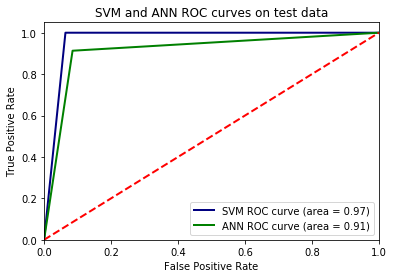

In [12]:
from sklearn.metrics import roc_curve, auc

fpr1, tpr1, _ = roc_curve(y_test, svm_test_predictions)
roc_auc1 = auc(fpr1, tpr1)
    
fpr2, tpr2, _ = roc_curve(y_test, ann_test_predictions)
roc_auc2 = auc(fpr2, tpr2)

plt.figure()
plt.plot(fpr1, tpr1, color='navy', lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='ANN ROC curve (area = %0.2f)' % roc_auc2)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM and ANN ROC curves on test data')
plt.legend(loc = "lower right")
plt.show()